# Assignment Goals

Assignment 6 requires you to implement gradient descent based optimization.  

- Minimum requirement: adapt the code from the presentation to optimize as many of the functions below as possible.
- Write a generic function that will take in 2 other functions as input, and a range of values within which to search, and then implement gradient descent to find the optimum.  The basic requirements of gradient descent are already available in the presentation.
-  For some assignments, the gradient has not been given.  You can either write the function on your own, or suggest other methods that can achieve this purpose.

In [2]:
# The following imports are assumed for the rest of the problems
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from numpy import cos, sin, pi, exp 

In [3]:
def func1var(f1, df1, r, xa, lr):
    bestx = xa
    fig, ax = plt.subplots()
    xt = np.linspace(r[0],r[1],200)
    yt = f1(xt)
    ax.plot(xt, yt)
    xall, yall = [], []
    lnall,  = ax.plot([], [], 'ro')
    lngood, = ax.plot([], [], 'go', markersize=10)
    
    def onestepderiv(frame):
        nonlocal bestx
        x = bestx - df1(bestx) * lr 
        if (df1(x) == 0 and f1(x) > f1(x-0.1)):
            x = x-0.1
        bestx = x
        y = f1(x)
        lngood.set_data(x, y)
        xall.append(x)
        yall.append(y)
        lnall.set_data(xall, yall)

    ani= FuncAnimation(fig, onestepderiv, frames=range(1000), interval=0.1, repeat=False)
    return ani

In [4]:
def anim2(f3,df3_dx,df3_dy,rx,ry,lr):
    bestx = (rx[0]+rx[1])/2
    besty = (ry[0]+ry[1])/2
    x1 = np.linspace(rx[0], rx[1], 100)
    y1 = np.linspace(ry[0], ry[1], 100)
    X, Y = np.meshgrid(x1, y1)
    Z = f3(X, Y)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    xall, yall, zall = [], [] ,[]
    surf = ax.plot_surface(X, Y, Z)
    lnall,  = ax.plot([], [], [],'ro')
    lngood, = ax.plot([], [], [],'go',markersize=10)
    
    def onestepderiv(frame):
        nonlocal bestx, besty
        x = bestx - df3_dx(bestx , besty) * lr 
        y = besty - df3_dy(bestx , besty) * lr 
        bestx = x
        besty = y
        z = f3(x , y)
        lngood.set_data([x], [y])
        lngood.set_3d_properties([z])
        xall.append(x)
        yall.append(y)
        zall.append(z)
        lnall.set_data(xall, yall)
        lnall.set_3d_properties(zall)
        # return lngood,

    ani= FuncAnimation(fig, onestepderiv, frames=range(10000), interval=0.01, repeat=False)
    
    return ani


The func1var function takes four arguments: f1, df1, r, and lr. It creates a matplotlib figure and plots the graph of f1 in the search space defined by r. The function initializes two empty lists and two empty scatter plots to store and visualize the points visited during the optimization process. It defines a nested function called onestepderiv which updates the current estimate of the minimum by taking a step in the direction of steepest descent of f1 using the learning rate lr. If the derivative of f1 at the new estimate is zero and f1 is greater than f1 evaluated at a point slightly to the left of the new estimate, then the function adjusts the new estimate to be slightly to the left. The function updates the lists and scatter plots with the new point and estimate. Finally, the function returns an animation object created using the FuncAnimation method of matplotlib, which calls onestepderiv for a range of 1000 frames with an interval of 0.1 milliseconds between each frame and repeats the animation only once

## Problem 1 - 1-D simple polynomial

The gradient is not specified.  You can write the function for gradient on your own.  The range within which to search for minimum is [-5, 5].

In [10]:
def f1(x):
    return x ** 2 + 3 * x + 8
def df1(x):
    return 2*x + 3
xbase = np.linspace(-5,5,300)
ybase = f1(xbase)

## Plotting the function

In [ ]:
ani = func1var(f1, df1, [-5,5],0,0.1)
plt.show()
f1 = "1d simple.gif" 
writergif = animation.PillowWriter(fps=30) 
ani.save(f1, writer=writergif)


## Problem 2 - 2-D polynomial

Functions for derivatives, as well as the range of values within which to search for the minimum, are given.

In [11]:
xlim3 =  [-10, 10]
ylim3 =  [-10, 10]
def f3(x, y):
    return x**4 - 16*x**3 + 96*x**2 - 256*x + y**2 - 4*y + 262

def df3_dy(x, y):
    return 2*y - 4

def df3_dx(x,y):
    return 4*x**3 - 48*x**2 + 192*x - 256

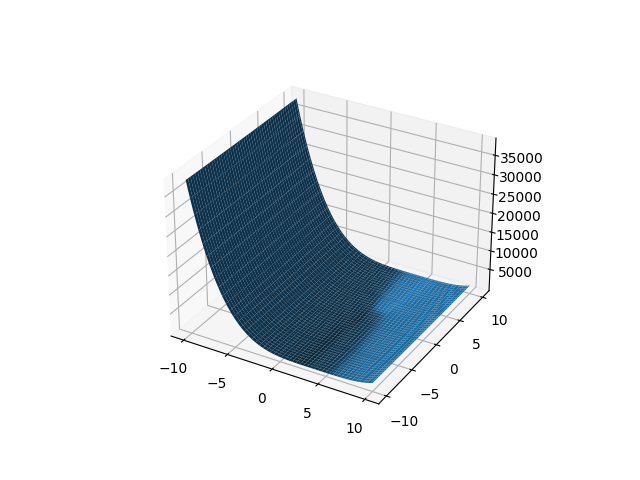

In [12]:
ani1 = anim2(f3,df3_dx,df3_dy,[-10, 10],[-10, 10],0.005)
plt.show()

## Problem 3 - 2-D function 

Derivatives and limits given. 

In [5]:
xlim4 = [-pi, pi]
def f4(x,y):
    return exp(-(x - y)**2)*sin(y)

def df4_dx(x, y):
    return -2*exp(-(x - y)**2)*sin(y)*(x - y)

def df4_dy(x, y):
    return exp(-(x - y)**2)*cos(y) + 2*exp(-(x - y)**2)*sin(y)*(x - y)


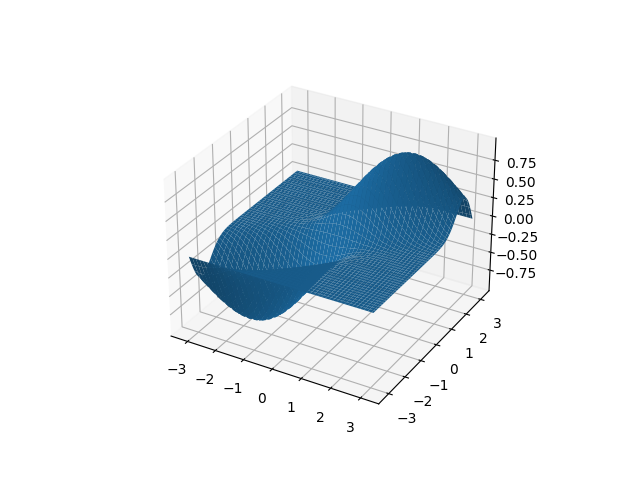

In [6]:
plt.close()
ani2 = anim2(f4,df4_dx,df4_dy,[-pi, pi],[-pi, pi],0.005)
plt.show()

## Problem 4 - 1-D trigonometric

Derivative not given.  Optimization range [0, 2*pi]

In [15]:
def f5(x):
    return cos(x)**4 - sin(x)**3 - 4*sin(x)**2 + cos(x) + 1
def df5_dx(x):
    return -4*sin(x)*cos(x)**3 - 3*cos(x)*sin(x)**2 - 8*sin(x)*cos(x) -sin(x)

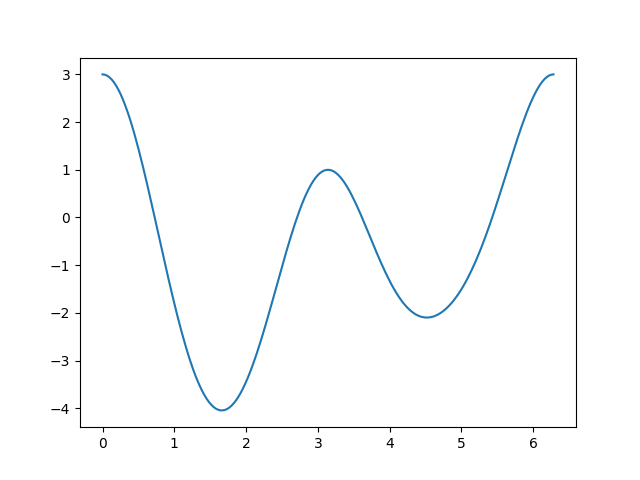

In [16]:
ani3 = func1var(f5,df5_dx,[0, 2*pi],0.1,0.005)
plt.show()


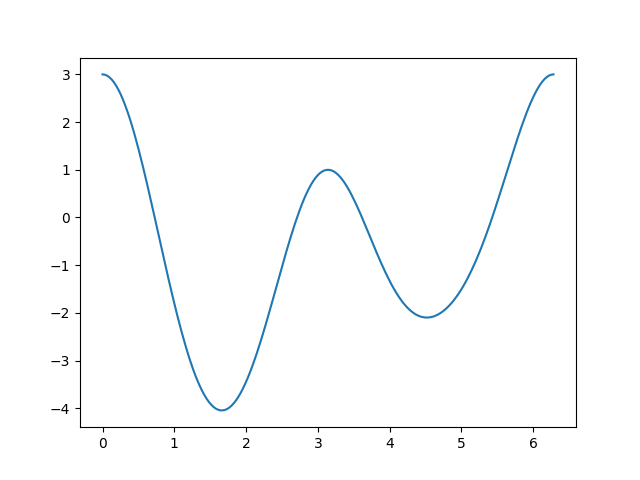

In [17]:
ani4 = func1var(f5,df5_dx,[0, 2*pi],6.27,0.005)
plt.show()

Since there are two minimas, where you start from will change in the place where you end up